In [1]:
import os
import pandas as pd
from route_handler.route_handler import RouteHandler

rt = RouteHandler()

data = rt.get_topic_by_type(type="RT0", caid="C02")

df = pd.DataFrame(data)

            
print("df.columns 확인")
print(df.columns)

print("df.head() 확인")
print(df.head(100))

06/15/2024 05:14:34 AM - honeybee - INFO - route_handler.py: get_request 
DEBUG MODE


http://localhost:5000/api/topic?caid=C02&type=RT0
df.columns 확인
Index(['bbox', 'end_pos', 'id', 'image_number', 'positive_yn', 'prid', 'reid',
       'sentiment_scale', 'start_pos', 'text', 'topic_code', 'topic_name',
       'topic_score', 'tpid', 'type'],
      dtype='object')
df.head() 확인
    bbox  end_pos   id image_number positive_yn  prid reid  sentiment_scale  \
0   None       12   51         None           Y  P057  R01                2   
1   None       76   52         None           Y  P057  R01                2   
2   None       97   53         None           Y  P057  R01                1   
3   None      100   54         None           Y  P057  R01                1   
4   None      120   55         None           Y  P057  R01                2   
..   ...      ...  ...          ...         ...   ...  ...              ...   
95  None      188  146         None           Y  P057  R0G                2   
96  None      205  147         None           Y  P057  R0G                3 

In [32]:
import numpy as np

sentiment_df = df[['topic_code', 'positive_yn', 'sentiment_scale']]

sentiment_df['positive_coef'] = sentiment_df['positive_yn'].apply(lambda x: 1 if x == 'Y' else -1)
sentiment_df['sentiment_score'] = sentiment_df['positive_coef'] * sentiment_df['sentiment_scale']
sentiment_df.drop(['positive_yn', 'sentiment_scale', 'positive_coef'], axis=1, inplace=True)
sentiment_df
# topic_code의 빈도 계산
topic_counts = sentiment_df['topic_code'].value_counts()

# # topic_code의 빈도가 50 이하인 topic_code 필터링
low_frequency_topics = topic_counts[topic_counts <= 50].index

# # topic_code의 빈도가 50 이하인 행 제거
sentiment_df = sentiment_df[~sentiment_df['topic_code'].isin(low_frequency_topics)]
sentiment_df = sentiment_df.groupby('topic_code')['sentiment_score'].apply(list).reset_index()
sentiment_df['sentiment_score_std'] = sentiment_df['sentiment_score'].apply(lambda x: np.std(x))
sentiment_df['sentiment_score_count'] = sentiment_df['sentiment_score'].apply(lambda x: len(x))
sentiment_df['sentiment_score_mean'] = sentiment_df['sentiment_score'].apply(lambda x: np.mean(x))
sentiment_df.drop('sentiment_score', axis=1, inplace=True)
s = sentiment_df.to_dict(orient='records')
s



C:\Users\82104\AppData\Local\Temp\ipykernel_1272\387345557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['positive_coef'] = sentiment_df['positive_yn'].apply(lambda x: 1 if x == 'Y' else -1)
C:\Users\82104\AppData\Local\Temp\ipykernel_1272\387345557.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment_score'] = sentiment_df['positive_coef'] * sentiment_df['sentiment_scale']
C:\Users\82104\AppData\Local\Temp\ipykernel_1272\387345557.py:7: SettingWithCopyWarning: 
A v

[{'topic_code': 'battery_capacity',
  'sentiment_score_std': 1.3251626989604652,
  'sentiment_score_count': 103,
  'sentiment_score_mean': 1.4077669902912622},
 {'topic_code': 'cable',
  'sentiment_score_std': 1.7391639824998364,
  'sentiment_score_count': 54,
  'sentiment_score_mean': 1.1111111111111112},
 {'topic_code': 'charging',
  'sentiment_score_std': 1.2649110640673518,
  'sentiment_score_count': 100,
  'sentiment_score_mean': 1.6},
 {'topic_code': 'color',
  'sentiment_score_std': 0.9284973740295994,
  'sentiment_score_count': 67,
  'sentiment_score_mean': 2.0597014925373136},
 {'topic_code': 'delivery/packaging/shipping',
  'sentiment_score_std': 0.7235434914988167,
  'sentiment_score_count': 61,
  'sentiment_score_mean': 1.9672131147540983},
 {'topic_code': 'design',
  'sentiment_score_std': 0.6716604942594675,
  'sentiment_score_count': 133,
  'sentiment_score_mean': 2.0},
 {'topic_code': 'size',
  'sentiment_score_std': 1.166845816219209,
  'sentiment_score_count': 122,
  

In [4]:
sentiment_df = df[['topic_code', 'positive_yn', 'sentiment_scale']]

sentiment_df['positive_coef'] = sentiment_df['positive_yn'].apply(lambda x: 1 if x == 'Y' else -1)
sentiment_df['sentiment_score'] = sentiment_df['positive_coef']* sentiment_df['sentiment_scale']

sentiment_df = sentiment_df.groupby(['topic_code']).agg({'sentiment_score':'mean'}).reset_index()
sentiment_df['z_sentiment_score'] = (sentiment_df['sentiment_score'] - sentiment_df['sentiment_score'].mean()) / sentiment_df['sentiment_score'].std()
sentiment_df.drop(['sentiment_score'], axis=1, inplace=True)

kano_model_df = pd.merge(whole_topic_kano_df, sentiment_df, on='topic_code')
kano_model_df

C:\Users\82104\AppData\Local\Temp\ipykernel_21452\3901344785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['positive_coef'] = sentiment_df['positive_yn'].apply(lambda x: 1 if x == 'Y' else -1)
C:\Users\82104\AppData\Local\Temp\ipykernel_21452\3901344785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment_score'] = sentiment_df['positive_coef']* sentiment_df['sentiment_scale']


,topic_code,whole_topic_tf_itf,l2_norm_tf_itf,whole_topic_count,z_sentiment_score
0,accessories,0.012704,0.015262,2,0.773929
1,after_service,0.147602,0.177318,1,-2.390809
2,battery_capacity,0.283905,0.341061,103,0.305363
3,battery_charge_speed,0.054353,0.065295,12,-1.204032
4,cable,0.161963,0.194570,54,0.070654
5,carry_on,0.012704,0.015262,2,0.378337
6,case,0.012704,0.015262,2,-1.995217
7,charging,0.283990,0.341164,100,0.457455
8,charging_display,0.043399,0.052136,9,1.037657
9,color,0.186252,0.223749,67,0.821164


In [2]:
from route_handler.route_handler import RouteHandler

print(RouteHandler().get_kano_model_data(type="RT0", caid="C02"))


06/13/2024 10:36:18 AM - honeybee - INFO - route_handler.py: get_request 
DEBUG MODE


[{'data': [{'size': 2, 'x': 0.015261965594233583, 'y': 0.7739287699098755}], 'id': 'accessories'}, {'data': [{'size': 1, 'x': 0.17731806723514454, 'y': -2.390809078509011}], 'id': 'after_service'}, {'data': [{'size': 103, 'x': 0.34106087676120633, 'y': 0.3053632146828074}], 'id': 'battery_capacity'}, {'data': [{'size': 12, 'x': 0.0652953293316277, 'y': -1.2040323853519286}], 'id': 'battery_charge_speed'}, {'data': [{'size': 54, 'x': 0.1945699772543117, 'y': 0.07065369248345635}], 'id': 'cable'}, {'data': [{'size': 2, 'x': 0.015261965594233583, 'y': 0.37833653885751467}], 'id': 'carry_on'}, {'data': [{'size': 2, 'x': 0.015261965594233583, 'y': -1.99521684745665}], 'id': 'case'}, {'data': [{'size': 100, 'x': 0.34116398989642716, 'y': 0.45745498506798693}], 'id': 'charging'}, {'data': [{'size': 9, 'x': 0.05213567771771563, 'y': 1.0376569239447828}], 'id': 'charging_display'}, {'data': [{'size': 67, 'x': 0.22374856017895492, 'y': 0.821163663169859}], 'id': 'color'}, {'data': [{'size': 1, '

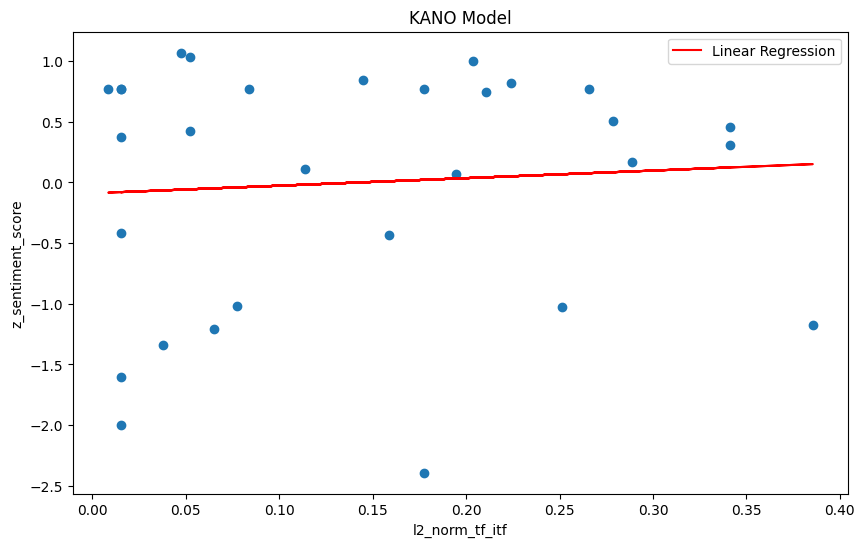

In [99]:
kano_model_df

import matplotlib.pyplot as plt
from scipy import stats

# 선형 회귀선 계산
slope, intercept, r_value, p_value, std_err = stats.linregress(kano_model_df['l2_norm_tf_itf'], kano_model_df['z_sentiment_score'])

# 선형 회귀선 그리기
line = slope * kano_model_df['l2_norm_tf_itf'] + intercept

plt.figure(figsize=(10, 6))
plt.scatter(kano_model_df['l2_norm_tf_itf'], kano_model_df['z_sentiment_score'])
plt.plot(kano_model_df['l2_norm_tf_itf'], line, 'r', label='Linear Regression')
plt.title('KANO Model')
plt.xlabel('l2_norm_tf_itf')
plt.ylabel('z_sentiment_score')
plt.legend()
plt.show()

In [ ]:
interested_df['Media Source'].value_counts()

## Install과 Event Date column 추가.

In [ ]:
interested_df.loc[:, 'Install Date'] = interested_df['Install Time'].str[:10]
# interested_df['date']
interested_df.loc[:, 'Event Date'] = interested_df['Event Time'].str[:10]
interested_df["Event Date"] = pd.to_datetime(interested_df["Event Date"])

## 일정 범위까지를 selected 시킴.

In [ ]:
start_date = '2023-01-10'
end_date = '2023-01-17'
selected_df = interested_df[(interested_df['Install Date'] >= start_date) & 
                            (interested_df['Install Date'] <= end_date)]
print(len(selected_df))
print(len(interested_df))

## 전체 기간에서의 유저수

In [ ]:

# install 유저 수
install_user_id = interested_df[(interested_df['Event Name'] == 'install')]['AppsFlyer ID'].unique()
install_user_count = len(install_user_id)
print(f"install 유저 수: {install_user_count}")

# Purchase 수
purchase_series = interested_df[(interested_df['Event Name'] == 'af_purchase')]['AppsFlyer ID']
purchase_count = len(purchase_series)
print(f"Purchase 수: {purchase_count}")

# Purchase한 유저 수
purchase_user_id = interested_df[(interested_df['Event Name'] == 'af_purchase')]['AppsFlyer ID'].unique()
purchase_user_count = len(purchase_user_id)
print(f"Purchase한 유저 수: {purchase_user_count}")

# Install한 유저 중에 Purchase한 유저 수
install_and_purchase_id = list(set(install_user_id) & set(purchase_user_id))
install_and_purchase_user_count = len(install_and_purchase_id)                                                                                         
print(f"Install한 유저 중에 Purchase한 유저 수: {install_and_purchase_user_count}")                                            


# Complete Registration 유저 수
complete_registration_user_id = interested_df[(interested_df['Event Name'] == 'af_complete_registration')]['AppsFlyer ID'].unique()
complete_registration_user_count = len(complete_registration_user_id)
print(f"Complete Registration 수: {complete_registration_user_count}")

# install한 유저 수 중에 complete registration한 유저 수
install_and_registration_user_id = list(set(install_user_id) & set(complete_registration_user_id))
install_and_registration_user_count = len(install_and_registration_user_id)                                            
print(f"install한 유저 수 중에 complete registration한 유저 수: {install_and_registration_user_count}")

# Install to Complete Registration 전환율 (Install to Complete Registration CVR)
print(f"Install to Complete Registration 전환율 (Install to Complete Registration CVR) : {install_and_registration_user_count/install_user_count:.2f}")

# Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)
print(f"Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR): {install_and_purchase_user_count/install_and_registration_user_count:.2f}")

# Event name에서 주목해야 할 것들.
# af_purchase
# install
# af_complete_registration



## 이번 광고 캠페인에 해당하는 유저 수

In [ ]:

# install 유저 수
selected_install_user_id = selected_df[(selected_df['Event Name'] == 'install')]['AppsFlyer ID'].unique()
selected_install_user_count = len(selected_install_user_id)
print(f"install 유저 수: {selected_install_user_count}")

# Purchase 수
selected_purchase_series = selected_df[(selected_df['Event Name'] == 'af_purchase')]['AppsFlyer ID']
selected_purchase_count = len(selected_purchase_series)
print(f"Purchase 수: {selected_purchase_count}")

# Purchase한 유저 수
selected_purchase_user_id = selected_df[(selected_df['Event Name'] == 'af_purchase')]['AppsFlyer ID'].unique()
selected_purchase_user_count = len(selected_purchase_user_id)
print(f"Purchase한 유저 수: {selected_purchase_user_count}")

# Install한 유저 중에 Purchase한 유저 수
selected_install_and_purchase_id = list(set(selected_install_user_id) & set(selected_purchase_user_id))
selected_install_and_purchase_user_count = len(selected_install_and_purchase_id)                                                                                         
print(f"Install한 유저 중에 Purchase한 유저 수: {selected_install_and_purchase_user_count}")                                            


# Complete Registration 유저 수
selected_complete_registration_user_id = selected_df[(selected_df['Event Name'] == 'af_complete_registration')]['AppsFlyer ID'].unique()
selected_complete_registration_user_count = len(selected_complete_registration_user_id)
print(f"Complete Registration 수: {selected_complete_registration_user_count}")

# install한 유저 수 중에 complete registration한 유저 수
selected_install_and_registration_user_id = list(set(selected_install_user_id) & set(selected_complete_registration_user_id))
selected_install_and_registration_user_count = len(selected_install_and_registration_user_id)                                            
print(f"install한 유저 수 중에 complete registration한 유저 수: {selected_install_and_registration_user_count}")

# Install to Complete Registration 전환율 (Install to Complete Registration CVR)
print(f"Install to Complete Registration 전환율 (Install to Complete Registration CVR) : {selected_install_and_registration_user_count/selected_install_user_count:.2f}")

# Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)
print(f"Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR): {selected_install_and_purchase_user_count/selected_install_and_registration_user_count:.2f}")

# Event name에서 주목해야 할 것들.
# af_purchase
# install
# af_complete_registration

In [ ]:
notin_selected = interested_df[~interested_df['AppsFlyer ID'].isin(selected_install_user_id)]
print(len(notin_selected))
print(len(interested_df))
print(len(selected_df))

In [ ]:
interested_df['Event Date'].groupby(interested_df['Event Date'].dt.date).count().plot(kind='bar')

## 광고캠페인에 해당하지 않는 경우 (Install을 더 전에 한 경우)

In [ ]:
# install 유저 수
notin_selected_install_user_id = notin_selected[(notin_selected['Event Name'] == 'install')]['AppsFlyer ID'].unique()
notin_selected_install_user_count = len(notin_selected_install_user_id)
print(f"install 유저 수: {notin_selected_install_user_count}")

# Purchase 수
notin_selected_purchase_series = notin_selected[(notin_selected['Event Name'] == 'af_purchase')]['AppsFlyer ID']
notin_selected_purchase_count = len(notin_selected_purchase_series)
print(f"Purchase 수: {notin_selected_purchase_count}")

# Purchase한 유저 수
notin_selected_purchase_user_id = notin_selected[(notin_selected['Event Name'] == 'af_purchase')]['AppsFlyer ID'].unique()
notin_selected_purchase_user_count = len(notin_selected_purchase_user_id)
print(f"Purchase한 유저 수: {notin_selected_purchase_user_count}")

# Complete Registration 유저 수
notin_selected_complete_registration_user_id = notin_selected[(notin_selected['Event Name'] == 'af_complete_registration')]['AppsFlyer ID'].unique()
notin_selected_complete_registration_user_count = len(notin_selected_complete_registration_user_id)
print(f"Complete Registration 수: {notin_selected_complete_registration_user_count}")

# Complete Registration to Purchase 전환율 (설치는 과거에 함)
notin_selected_complete_registration_and_purchase_id = list(set(notin_selected_complete_registration_user_id) & set(notin_selected_purchase_user_id))
notin_selected_complete_registration_and_purchase_user_count = len(notin_selected_complete_registration_and_purchase_id)
print(f"Complete Registration to Purchase 전환율 (설치는 과거에 함) (Complete Registration to Purchase CVR): {notin_selected_complete_registration_and_purchase_user_count/notin_selected_complete_registration_user_count:.2f}")

In [ ]:
interested_df['Install Time'].sort_values(ascending=False)

##  비용 계산 (AD Channel에서의 install 당 비용 계산임)

In [ ]:
dir_path = r"assignment_data/"
# calculate_adchannel(dir_path)

# DF LOAD
moloco_df = pd.read_csv('assignment_data/moloco_adchannel.csv', encoding='utf-8')
twitter_df = pd.read_csv('assignment_data/twitter_adchannel.csv', encoding='utf-8')
apple_df = pd.read_csv('assignment_data/apple_adchannel.csv', encoding='utf-8')    

if moloco_df['date'].dtype == 'object':
    moloco_df['date'] = moloco_df['date'].str[:10]
else:
    moloco_df['date'] = moloco_df['date'].astype(str)
    moloco_df['date'] = moloco_df['date'].str[:10]

if twitter_df['date'].dtype == 'object':
    twitter_df['date'] = twitter_df['date'].str[:10]
else:
    twitter_df['date'] = twitter_df['date'].astype(str)
    twitter_df['date'] = twitter_df['date'].str[:10]

if apple_df['date'].dtype == 'object':
    apple_df['date'] = apple_df['date'].str[:10]
else:
    apple_df['date'] = apple_df['date'].astype(str)
    apple_df['date'] = apple_df['date'].str[:10]


moloco_date_installs_cost = moloco_df.groupby('date')[['installs', 'cost']].sum()
twitter_date_installs_cost = twitter_df.groupby('date')[['mobile_conversion_installs', 'billed_charge']].sum()
apple_date_installs_cost = apple_df.groupby('date')[['installs', 'localSpend']].sum()

moloco_date_impressions = moloco_df.groupby('date')['impressions'].sum()
twitter_date_impressions = twitter_df.groupby('date')['impressions'].sum()
apple_date_impressions = apple_df.groupby('date')['impressions'].sum()

moloco_date_click = moloco_df.groupby('date')['clicks'].sum()
twitter_date_click = twitter_df.groupby('date')['clicks'].sum()
apple_date_click = apple_df.groupby('date')['taps'].sum()


# Install 한 유저 1명당 광고 비용 (CAC(Install)) (By AdChannel)
total_cost = moloco_date_installs_cost['cost'].sum() + twitter_date_installs_cost['billed_charge'].sum() + apple_date_installs_cost['localSpend'].sum()
total_installs = moloco_date_installs_cost['installs'].sum() + twitter_date_installs_cost['mobile_conversion_installs'].sum() + apple_date_installs_cost['installs'].sum()
cost_per_install = total_cost / total_installs
print(f"Install 한 유저 1명당 광고 비용 (CAC(Install)): {cost_per_install:.2f}")

# 1000번 impression당 광고 비용 (CPM(Install)) (By AdChannel)
total_impressions = moloco_date_impressions.sum() + twitter_date_impressions.sum() + apple_date_impressions.sum()
cost_per_mille_impression = (total_cost / total_impressions) * 1000
print(f"1000번 Impressions당 광고 비용 (CPM): {cost_per_mille_impression:.2f}")

# click(Tap)당 광고 비용 (CPM(Install)) (By AdChannel)
total_clicks = moloco_date_click.sum() + twitter_date_click.sum() + apple_date_click.sum()
cost_per_click = total_cost / total_clicks
print(f"Click(Tap)당 광고 비용 (CPC): {cost_per_click:.2f}")



## Appsflyer + Adchannel 역산 (Install한 유저 당 광고 비용 기준)

In [ ]:
# Install 한 유저 1명당 광고 비용 (CAC(Install)) (By AdChannel)
cost_per_install

# 일자별 광고 비용
# Date 별 Install 한 유저 1명당 광고 비용 (CAC(Install)) (By AdChannel)
moloco_date_installs_cost
twitter_date_installs_cost.rename(columns={'mobile_conversion_installs': 'installs', 'billed_charge': 'cost'}, inplace=True)
apple_date_installs_cost.rename(columns={'localSpend': 'cost'}, inplace=True)
# total_date_installs_cost = moloco_date_installs_cost + twitter_date_installs_cost + apple_date_installs_cost
# mobile_conversion_installs', 'billed_charge
# localSpend

total_date_installs_cost = pd.concat([moloco_date_installs_cost, twitter_date_installs_cost, apple_date_installs_cost], axis=0)
total_date_installs_cost = total_date_installs_cost.groupby('date').sum().reset_index()
total_date_installs_cost['CAC(Install)'] = total_date_installs_cost['cost'] / total_date_installs_cost['installs']
print(total_date_installs_cost)
print(total_date_installs_cost.dtypes)

# 날짜별 CAC(Install)을 이용한 광고 비용 역산

In [ ]:
total_date_installs_cost.drop(columns=['cost', 'installs'], axis=1, inplace=True)

In [ ]:
# Install Date	Event Date	Media Source	Campaign ID	Event Name	AppsFlyer ID
result_df = selected_df[["Install Date",	"Event Date",	"Media Source",	"Campaign ID",	"Event Name",	"AppsFlyer ID"]]
result_df

### total_date_installs_cost에서 날짜별 cost 갱신

In [ ]:
# 날짜 별 Install 한 유저 수
temp_df = result_df[result_df['Event Name'] == 'install'][['Install Date', 'AppsFlyer ID']].drop_duplicates(subset='AppsFlyer ID', keep='first')
temp_df = temp_df.groupby('Install Date').count().reset_index()
temp_df.rename(columns={'AppsFlyer ID': 'install'}, inplace=True)

total_date_installs_cost = pd.merge(total_date_installs_cost, temp_df, left_on='date', right_on='Install Date', how='left')
total_date_installs_cost.drop(columns="Install Date", axis=1, inplace=True)
total_date_installs_cost

In [ ]:
# 총 cost 계산
total_date_installs_cost['cost'] = total_date_installs_cost['CAC(Install)'] * total_date_installs_cost['install']
total_date_installs_cost

In [ ]:
temp_df

In [ ]:
# 날짜별 Complete Registration 한 유저 수
installed_id_series = result_df[result_df['Event Name'] == 'install']['AppsFlyer ID']

temp_df = result_df[(result_df['Event Name'] == 'af_complete_registration') 
                    & result_df['AppsFlyer ID'].isin(installed_id_series)][['Event Date', 'AppsFlyer ID']].drop_duplicates(subset='AppsFlyer ID', keep='first')
temp_df = temp_df.groupby('Event Date').count().reset_index()
temp_df.rename(columns={'AppsFlyer ID': 'install to complete_registration'}, inplace=True)
temp_df['Event Date'] = temp_df['Event Date'].astype(str)

total_date_installs_cost = pd.merge(total_date_installs_cost, temp_df, left_on='date', right_on='Event Date', how='left')
total_date_installs_cost.drop(columns="Event Date", axis=1, inplace=True)
total_date_installs_cost

In [ ]:
# 날짜별 Install to Complete Registration 전환율 (Install to Complete Registration CVR) 
total_date_installs_cost['install to Complete Registration CVR'] = total_date_installs_cost.loc[:, 'install to complete_registration'] / total_date_installs_cost.loc[:, 'install']
total_date_installs_cost

In [ ]:
# 날짜별 Purchase 수
# total_date_installs_cost['install to complete_registration']
purchase_id = result_df[result_df['Event Name'] == 'af_purchase']['AppsFlyer ID'].unique()
temp_df = result_df[(result_df['Event Name'] == 'af_purchase') 
                    & result_df['AppsFlyer ID'].isin(purchase_id)][['Event Date', 'AppsFlyer ID']]
temp_df = temp_df.groupby('Event Date').count().reset_index()
temp_df.rename(columns={'AppsFlyer ID': 'install to purchase'}, inplace=True)
temp_df['Event Date'] = temp_df['Event Date'].astype(str)

total_date_installs_cost = pd.merge(total_date_installs_cost, temp_df, left_on='date', right_on='Event Date', how='left')
total_date_installs_cost.drop(columns="Event Date", axis=1, inplace=True)
total_date_installs_cost



In [ ]:
# 날짜별 Purchase 한 유저 수
purchase_id = result_df[result_df['Event Name'] == 'af_purchase']['AppsFlyer ID'].unique()
temp_df = result_df[(result_df['Event Name'] == 'af_purchase') 
                    & result_df['AppsFlyer ID'].isin(purchase_id)][['Event Date', 'AppsFlyer ID']].drop_duplicates(subset='AppsFlyer ID', keep='first')
temp_df = temp_df.groupby('Event Date').count().reset_index()
temp_df.rename(columns={'AppsFlyer ID': 'install to purchased users count'}, inplace=True)
temp_df['Event Date'] = temp_df['Event Date'].astype(str)

total_date_installs_cost = pd.merge(total_date_installs_cost, temp_df, left_on='date', right_on='Event Date', how='left')
total_date_installs_cost.drop(columns="Event Date", axis=1, inplace=True)
total_date_installs_cost

In [ ]:
# 날짜별 Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)
total_date_installs_cost['complete_registration to purchase CVR'] = total_date_installs_cost['install to purchased users count'] / total_date_installs_cost['install to complete_registration']
total_date_installs_cost

In [ ]:
# Purchase 1회당 광고 비용 (CPA(Purchase))
total_date_installs_cost['CPA(Purchase)'] = total_date_installs_cost['cost'] / total_date_installs_cost['install to purchase']
total_date_installs_cost

In [ ]:
# Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup))
total_date_installs_cost['CAC(Signup)'] = total_date_installs_cost['cost'] / total_date_installs_cost['install to complete_registration']
total_date_installs_cost

In [ ]:
# Purchase 한 유저 1명당 광고 비용 (CAC(Purchase))
total_date_installs_cost['CAC(Purchase)'] = total_date_installs_cost['cost'] / total_date_installs_cost['install to purchased users count']
total_date_installs_cost

In [ ]:
# install 유저 수
print(f"install 유저 수: {total_date_installs_cost['install'].sum()}")

# Purchase 수
print(f"Purchase 수: {total_date_installs_cost['install to purchase'].sum()}")

# Purchase한 유저 수
print(f"Purchase한 유저 수: {total_date_installs_cost['install to purchased users count'].sum()}")

# Complete Registration 유저 수
print(f"Complete Registration 수: {total_date_installs_cost['install to complete_registration'].sum()}")

# Install to Complete Registration 전환율 (Install to Complete Registration CVR)
print(f"Install to Complete Registration 전환율 (Install to Complete Registration CVR) : {total_date_installs_cost['install to Complete Registration CVR'].dot(total_date_installs_cost['install']) / total_date_installs_cost['install'].sum():.2f}")

# Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR)
print(f"Complete Registration to Purchase 전환율 (Complete Registration to Purchase CVR): {total_date_installs_cost['complete_registration to purchase CVR'].dot(total_date_installs_cost['install to complete_registration']) / total_date_installs_cost['install to complete_registration'].sum():.2f}")

# Install 한 유저 1명당 광고 비용 (CAC(Install))
print(f"Install 한 유저 1명당 광고 비용 (CAC(Install)): {total_date_installs_cost['cost'].sum() / total_date_installs_cost['install'].sum():.0f}")

# Purchase 1회당 광고 비용 (CPA(Purchase))
print(f"Purchase 1회당 광고 비용 (CPA(Purchase)): {total_date_installs_cost['cost'].sum() / total_date_installs_cost['install to purchase'].sum():.0f}")

# Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup))
print(f"Complete Registration 한 유저 1명당 광고 비용 (CAC(Signup)): {total_date_installs_cost['cost'].sum() / total_date_installs_cost['install to complete_registration'].sum():.0f}")

# Purchase 한 유저 1명당 광고 비용 (CAC(Purchase))
print(f"Purchase 한 유저 1명당 광고 비용 (CAC(Purchase)): {total_date_installs_cost['cost'].sum() / total_date_installs_cost['install to purchased users count'].sum():.0f}")


In [ ]:
total_date_installs_cost.to_csv('date_to_result.csv', index=False, encoding='utf-8')
selected_df.to_csv('230110_to_230117.csv', index=False, encoding='utf-8')